In [1]:
# batch test


import pickle, json, copy, cv2
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
## read saved pickle of parsed annotations
with open ('val_imgs', 'rb') as fp:
    val_imgs = pickle.load(fp)

## read saved pickle of parsed annotations
with open ('train_imgs', 'rb') as fp:
    train_imgs = pickle.load(fp)

{'width': 640, 'object': [{'ymax': 529, 'box_height': 145, 'box_width': 290, 'xmax': 412, 'xmin': 122, 'ymin': 384, 'name': '1'}, {'ymax': 466, 'box_height': 207, 'box_width': 414, 'xmax': 480, 'xmin': 66, 'ymin': 259, 'name': '1'}], 'filename': 'data/depth/seq0_0000_1.pgm', 'height': 480}


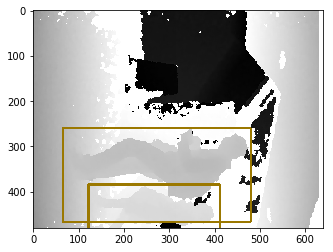

In [3]:
def draw_boxes(ann):
    
    img = cv2.imread(ann['filename'])


#     image_h, image_w, _ = img.shape

    for box in ann['object']:
       
       
        cv2.rectangle(img, (box['xmin'],box['ymin']), (box['xmax'],box['ymax']), (155,120*int(box['name']),0), 3)
       
        
    return img      

print train_imgs[1]
plt.imshow(draw_boxes(train_imgs[1]))

In [4]:
LABELS = ['1', '2']
# IMAGE_H, IMAGE_W = 416, 416
IMAGE_H, IMAGE_W =  480,640
GRID_H, GRID_W = 15 , 20
BOX              = 5
CLASS            = len(LABELS)

CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')

THRESHOLD = 0.3
# OBJ_THRESHOLD    = 0.3#0.5
# CLASS_THRESHOLD    = 0.3#0.45
# ANCHORS          = [149,74, 194,97, 282,141, 392,196, 511,255]
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]



SCALE_NOOB  = 1.0
SCALE_OBJECT     = 5.0
SCALE_COOR      = 1.0
SCALE_CLASS     = 1.0

BATCH_SIZE       = 16
WARM_UP_BATCHES  = 0
TRUE_BOX_BUFFER  = 50


generator_config = {
    'IMAGE_H'         : IMAGE_H, 
    'IMAGE_W'         : IMAGE_W,
    'GRID_H'          : GRID_H,  
    'GRID_W'          : GRID_W,
    'BOX'             : BOX,
    'LABELS'          : LABELS,
    'CLASS'           : len(LABELS),
    'ANCHORS'         : ANCHORS,
    'BATCH_SIZE'      : BATCH_SIZE,
    'TRUE_BOX_BUFFER' : 50,
}

In [5]:
from generator1 import DataGenerator, BoundBox
# Generators
train_gen = DataGenerator(train_imgs, generator_config)
idx =5

it=train_gen.__getitem__(idx)


# it[0][0]

Using TensorFlow backend.


9
8
0
4
[ 8.453125  9.390625 10.21875   5.09375   1.        1.        0.      ]
2
8
0
3
[8.46875  2.265625 9.125    4.53125  1.       1.       0.      ]
7
14
0
3
[14.40625   7.984375  4.6875    2.34375   1.        0.        1.      ]
13
12
0
3
[12.203125 13.078125 14.03125   3.84375   1.        0.        1.      ]
1
10
1
3
[10.25      1.265625  5.25      2.53125   1.        0.        1.      ]
7
9
2
3
[9.609375 7.46875  6.53125  3.25     1.       1.       0.      ]
8
9
2
3
[9.8125   8.671875 5.3125   2.65625  1.       0.       1.      ]
2
11
2
3
[11.046875  2.3125    6.15625   3.0625    1.        0.        1.      ]
7
8
3
4
[ 8.046875  7.21875  12.65625   6.3125    1.        1.        0.      ]
8
11
3
4
[11.75     8.90625 11.0625   5.5      1.       0.       1.     ]
5
8
4
3
[8.84375 5.      7.875   3.9375  1.      0.      1.     ]
8
9
4
3
[9.390625 8.359375 7.84375  3.90625  1.       1.       0.      ]
4
8
4
4
[ 8.90625   4.078125 12.125     6.03125   1.        1.        0.      ]
14


In [6]:
x = it[0][0]
np.sum(np.count_nonzero(x, axis=1), axis=1)

array([[306364],
       [305828],
       [306143],
       [306720],
       [306491],
       [305453],
       [306769],
       [306719],
       [306597],
       [306601],
       [306219],
       [306080],
       [306533],
       [306354],
       [306648],
       [306709]])

In [7]:
y = it[1][0]
print y.shape
print np.count_nonzero(y, axis=0)

(15, 20, 5, 7)
[[[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [1 1 1 1 1 1 0]
  [1 1 1 1 1 1 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 

In [8]:
x = it[0][0]
np.sum(np.count_nonzero(x, axis=1), axis=1)

array([[306364],
       [305828],
       [306143],
       [306720],
       [306491],
       [305453],
       [306769],
       [306719],
       [306597],
       [306601],
       [306219],
       [306080],
       [306533],
       [306354],
       [306648],
       [306709]])

In [9]:
np.set_printoptions(threshold='nan')


# x = it[0][0]
# print x.shape 

# with open('x_batch2.txt', 'w') as f:
#     print >> f, x  # Python 2.x



x = it[1][0]
with open('y_batch.txt', 'w') as f:
    print >> f, y  # Python 2.x
